In [1]:
from celluloid import Camera
import numpy as np
from numpy import exp,cumsum,pi,sin
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import trapz
from matplotlib.animation import PillowWriter

In [2]:
N = 300
x = np.linspace(-2*pi,2*pi,N)
y = cumsum(exp(-x / 10) * sin(x))

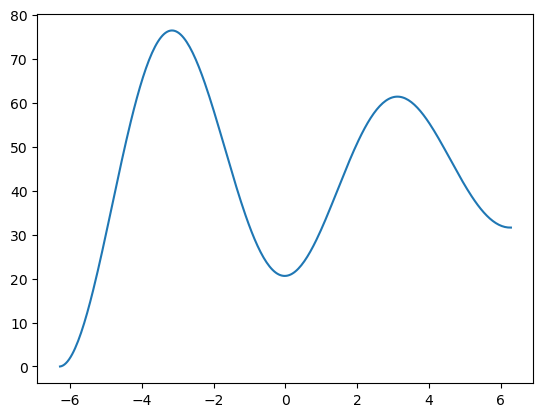

In [3]:
plt.plot(x,y)

In [4]:
sns.set(style="white")
sns.set_palette("pastel")
sns.set_context("paper")

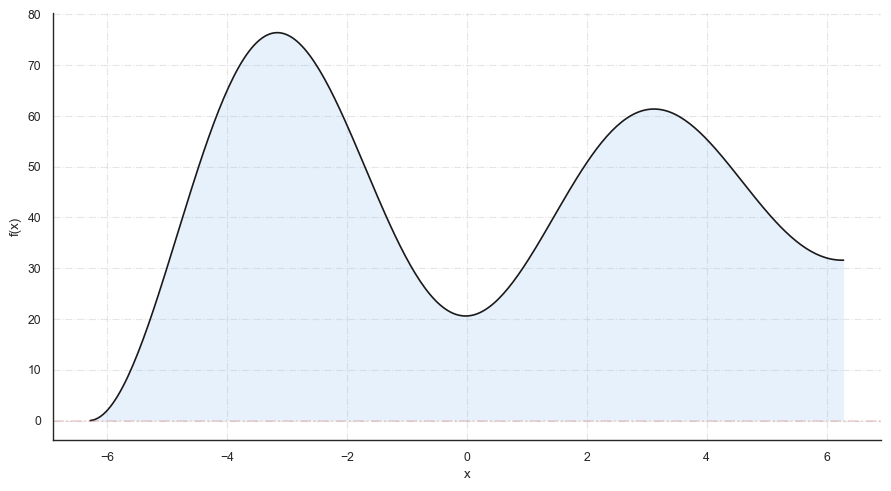

In [5]:
plt.figure(figsize=(9,5))

plt.plot(x,y,color="k")

plt.fill_between(x,y,0,alpha=0.25)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.axhline(0,color="r",alpha=0.25,ls="-.")
plt.grid(True,alpha=0.5,ls="-.")

sns.despine() 
plt.tight_layout()
plt.show()

In [6]:
%matplotlib qt

In [7]:
fig,ax = plt.subplots(figsize=(8,4.4))


camera = Camera(fig)

for index in range(N):

    ax.plot(x,y,color="k",lw=2,alpha=0.7)

    ax.scatter(x[index],y[index],c="#0096FF",s=80, edgecolor="black")
    
    ax.fill_between(x[:index],y[:index],0,color="#0096FF",alpha=0.13)
    

    
    
    area = trapz(y[:index],x[:index])
    
    ax.text(-1, 5, f"Area: {round(area,1)}")
   
    camera.snap()
    
    
anim = camera.animate(interval=30, # Merges captures(snaps)
                      repeat=True,blit=True)

ax.set_title("Real Time Area Calculator ")
ax.grid(True,alpha=0.3,ls="-.") 

plt.ylim(0,90)
plt.xlabel("x")
plt.ylabel("f (x)")

sns.despine() # Remove spines 

#anim.save('anim_1.gif',writer=PillowWriter(fps=30))
plt.show()